<a href="https://colab.research.google.com/github/jorgeroth/UCOM/blob/main/Proyecto_Diabetes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Machine Learning - Diabetes - Diplomado en Data Science - UCOM 2024**

## **Análisis y Predicción de Diabetes en Pacientes Basado en Datos Clínicos**

Este proyecto utiliza un dataset de Kaggle para predecir la probabilidad de diabetes en pacientes.
Incluye preprocesamiento de datos, análisis exploratorio y entrenamiento de modelo
(Regresión Logística).

### **Objetivo General:**
Analizar los factores clínicos relacionados con el diagnóstico de diabetes en mujeres de ascendencia indígena, utilizando técnicas cuantitativas para comprender su impacto y desarrollar herramientas predictivas que contribuyan al manejo y prevención de la enfermedad.

### **Objetivos Específicos:**
1.   Construir un modelo estadístico que permita predecir la probabilidad de que una mujer y de ascendencia indígena sea diagnosticada con diabetes, basándose en los datos clínicos disponibles, como glucosa en sangre, IMC y número de embarazos.

2.    Utilizar el modelo de regresión logística para identificar las variables que tienen un mayor peso en la predicción del diagnóstico de diabetes en mujeres indígenas , brindando información valiosa para la toma de decisiones clínicas.

3. Analizar cómo las características individuales del dataset, como la glucosa en sangre, el IMC y el número de embarazos, se asocian con la probabilidad de desarrollar diabetes en mujeres de esta población específica.


## 1. **Importar Librerías y Cargar los Datos**

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from imblearn.pipeline import Pipeline
from google.colab import drive

ruta = '/content/DataSet - Cronograma (1).xlsx'
data = pd.read_excel(ruta)

In [98]:
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2288.000,33,1


## 2.**Análisis Exploratorio de Datos (EDA)**

In [99]:
#Descripción de los datos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,81.627618,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,327.912860,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


from matplotlib import pyplot as plt
_df_0['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

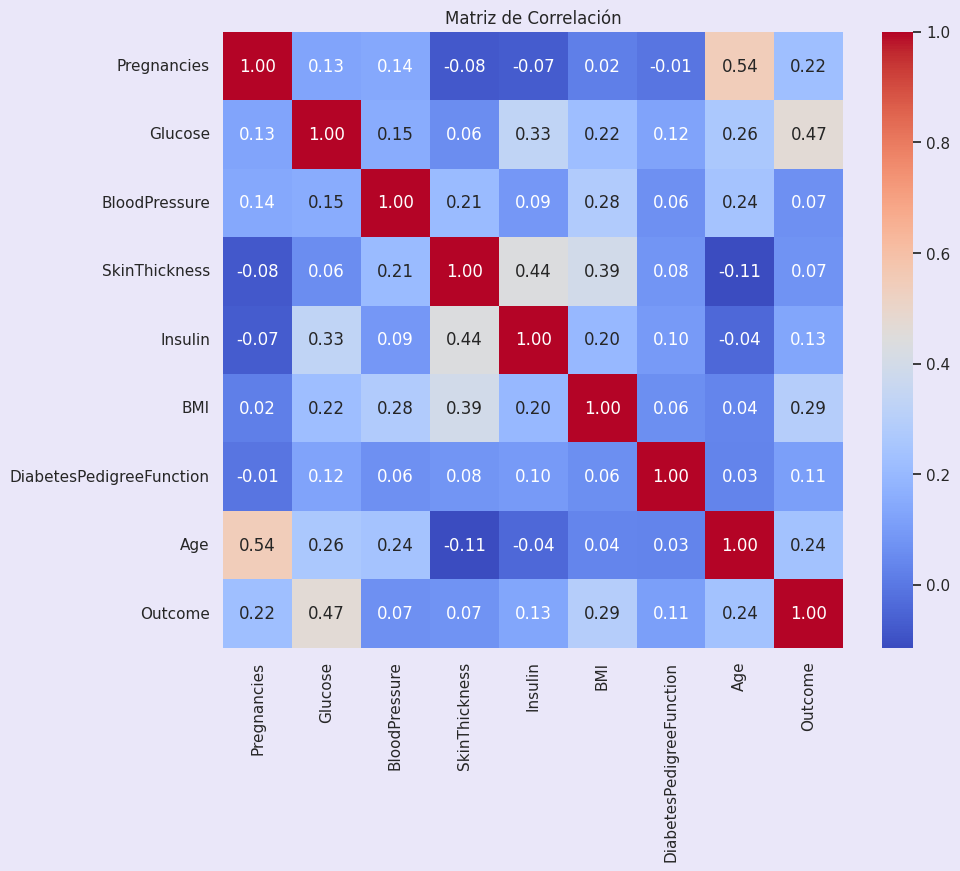

In [100]:
# Matriz de Correlación

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# 3. **Tratamiento de Datos**

In [ ]:
# Verificar las cantidades de valores nulos o cero que tiene cada variable
(data == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


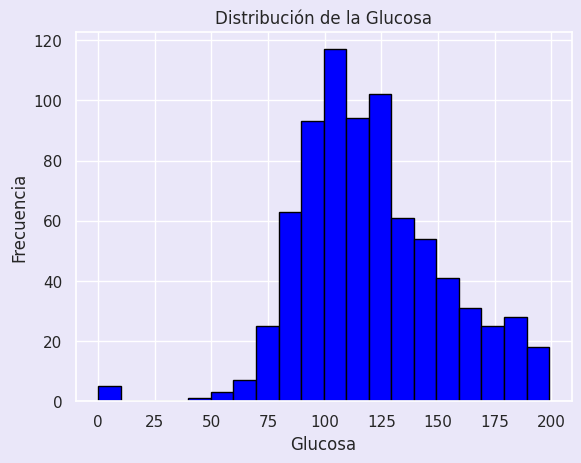

In [ ]:
plt.hist(data['Glucose'], bins=20, color='blue', edgecolor='black')
plt.title("Distribución de la Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.show()

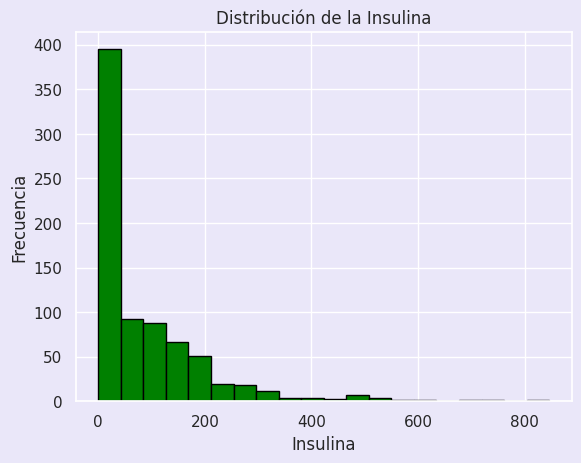

In [ ]:
plt.hist(data['Insulin'], bins=20, color='green', edgecolor='black')
plt.title("Distribución de la Insulina")
plt.xlabel("Insulina")
plt.ylabel("Frecuencia")
plt.show()

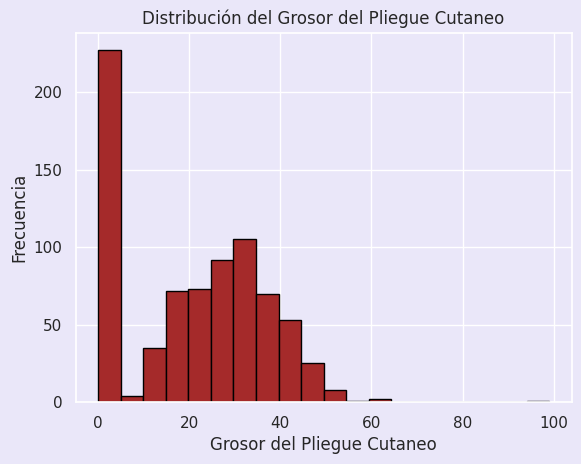

In [ ]:
plt.hist(data['SkinThickness'], bins=20, color='brown', edgecolor='black')
plt.title("Distribución del Grosor del Pliegue Cutaneo")
plt.xlabel("Grosor del Pliegue Cutaneo")
plt.ylabel("Frecuencia")
plt.show()

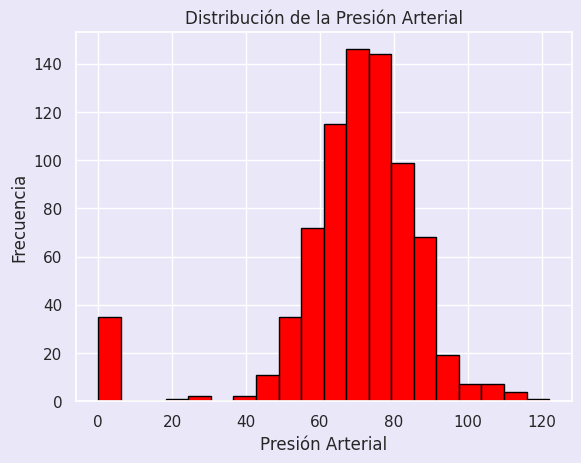

In [ ]:
plt.hist(data['BloodPressure'], bins=20, color='red', edgecolor='black')
plt.title("Distribución de la Presión Arterial")
plt.xlabel("Presión Arterial")
plt.ylabel("Frecuencia")
plt.show()

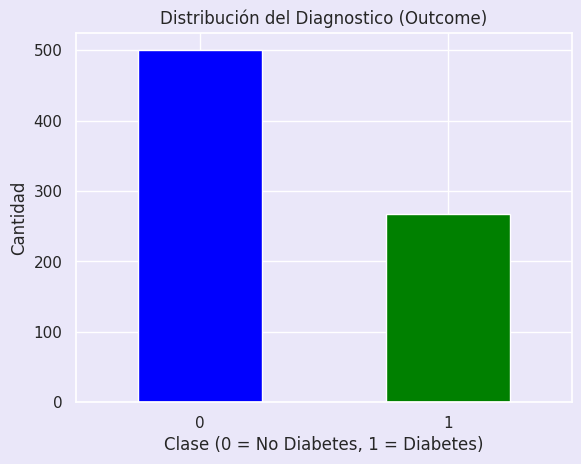

In [ ]:
data['Outcome'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title("Distribución del Diagnostico (Outcome)")
plt.xlabel("Clase (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

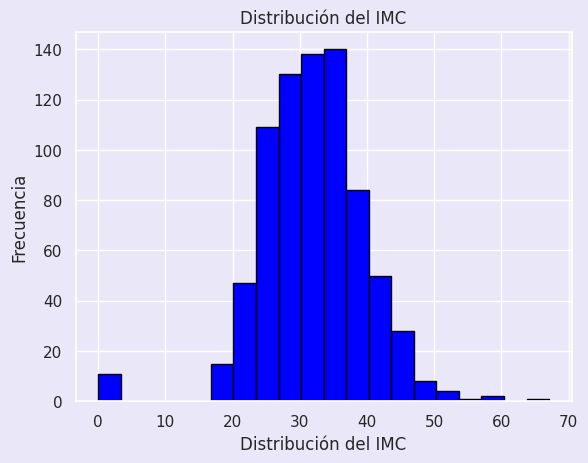

In [ ]:
plt.hist(data['BMI'], bins=20, color='blue', edgecolor='black')
plt.title("Distribución del IMC")
plt.xlabel("Distribución del IMC")
plt.ylabel("Frecuencia")
plt.show()

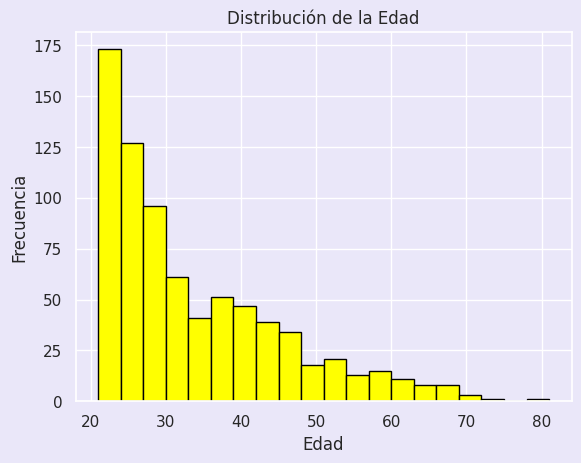

In [ ]:
plt.hist(data['Age'], bins=20, color='yellow', edgecolor='black')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

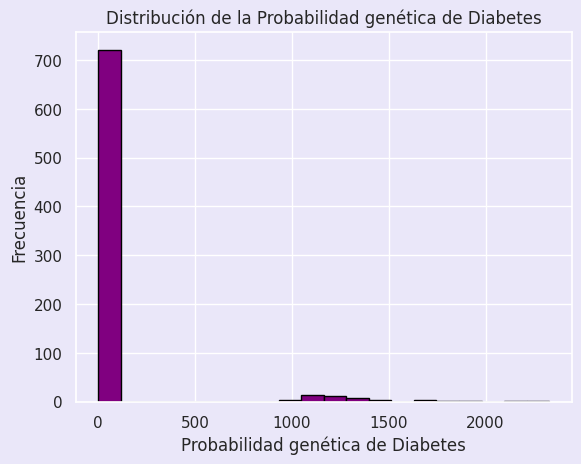

In [ ]:
plt.hist(data['DiabetesPedigreeFunction'], bins=20, color='purple', edgecolor='black')
plt.title("Distribución de la Probabilidad genética de Diabetes")
plt.xlabel("Probabilidad genética de Diabetes")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
## Eliminar los valores faltantes o 0

data2 = data[data['Insulin'] != 0]
type(data2)

pandas.core.frame.DataFrame

In [ ]:
#Verificamos que los datos tratados
(data2==0).sum()

,0
Pregnancies,57
Glucose,1
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,1
DiabetesPedigreeFunction,0
Age,0
Outcome,264


# 4. **División de Datos**

In [ ]:
# Separar las variables en (X) y variable objetivo (y)
X = data2.drop('Outcome', axis=1)
y = data2['Outcome']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. **Equilibrio y Entrenamiento de Modelos**

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=2)),  # Aplicar SMOTE para balancear clases
    ('log_reg', LogisticRegression(random_state=0, max_iter=1000))  # Modelo de regresión logística
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=2)),
                ('log_reg', LogisticRegression(max_iter=1000, random_state=0))])

# 6. **Evaluación de Modelos**

In [ ]:
# Evaluar en entrenamiento
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluar en test
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Entrenamiento:")
print(f"Precisión (Accuracy): {train_accuracy:.2f}")
print(f"F1-Score: {train_f1:.2f}")

print("Test:")
print(f"Precisión (Accuracy): {test_accuracy:.2f}")
print(f"F1-Score: {test_f1:.2f}")

Entrenamiento:
Precisión (Accuracy): 0.77
F1-Score: 0.67
Test:
Precisión (Accuracy): 0.82
F1-Score: 0.73


In [ ]:
# Detectar diferencias significativas
if abs(train_f1 - test_f1) > 0.15:
    print("Advertencia: Posible sobreajuste detectado.")
else:
  print("No se detecta sobreajuste")

No se detecta sobreajuste


## **Gráfico Comparativo entre el Entrenamiento y Test**

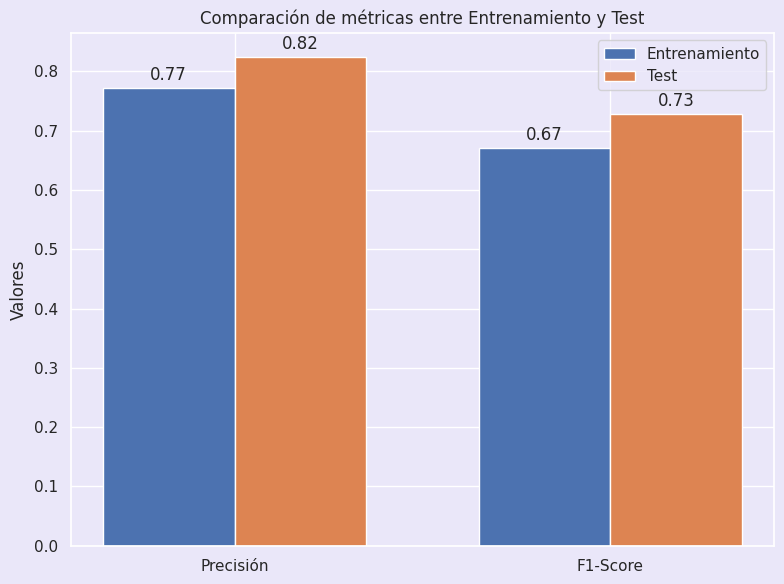

In [ ]:
metrics = ['Precisión', 'F1-Score']
train_values = [train_accuracy, train_f1]
test_values = [test_accuracy, test_f1]

# Configurar el gráfico
x = np.arange(len(metrics))  # Etiquetas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6)) # Tamaño del Gráfico

# Barras para entrenamiento y prueba
bars1 = ax.bar(x - width/2, train_values, width, label='Entrenamiento')
bars2 = ax.bar(x + width/2, test_values, width, label='Test')

# Etiquetas y Título
ax.set_ylabel('Valores') # Cantidad
ax.set_title('Comparación de métricas entre Entrenamiento y Test') # Título del Gráfico
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Mostrar valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


# **Evaluar el modelo en el conjunto de prueba**

In [ ]:
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nResultados en el conjunto de Test:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión Positiva (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Resultados en el conjunto de Test:
Precisión (Accuracy): 0.82
Precisión Positiva (Precision): 0.82
Sensibilidad (Recall): 0.65
F1-Score: 0.73
AUC-ROC: 0.89


## **Matriz de confusión - Entrenamiento**

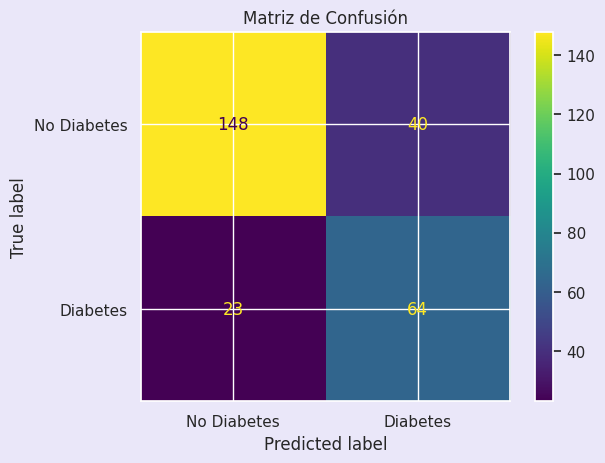

In [ ]:
conf_matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_train, y_train, display_labels=['No Diabetes', 'Diabetes'], cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

### Para la Matriz de Confusión del **entrenamiento** se visualiza que:

**True Label: No Diabetes**

1.   **148 casos predichos correctamente** (Verdaderos Negativos - TN): Esto significa que el modelo predijo correctamente que estas personas no tienen diabetes.
2.   **40 casos mal predichos como "Diabetes"** (Falsos Positivos - FP): Aquí el modelo clasificó erróneamente personas sanas como si tuvieran diabetes.

**True Label: Diabetes**

1.   **64 casos predichos correctamente** (Verdaderos Positivos - TP): El modelo identificó correctamente estos casos como diabetes.
2.  **23 casos mal predichos como "No Diabetes"** (Falsos Negativos - FN): El modelo no detectó que estas personas realmente tienen diabetes.






## **Matriz de confusión - Prueba**

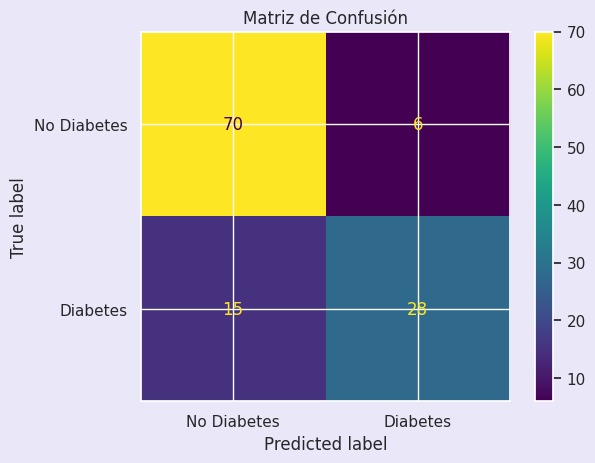

In [ ]:
conf_matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=['No Diabetes', 'Diabetes'], cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()

### Para la Matriz de Confusión de la **Prueba** se visualiza que:

**True Label: No Diabetes**

1.   **70 casos predichos correctamente** (Verdaderos Negativos - TN).
2.   **6 casos mal predichos como "Diabetes"** (Falsos Positivos - FP).

**True Label: Diabetes**

1.  **28 casos predichos correctamente** (Verdaderos Positivos - TP).
2.   **15 casos mal predichos como "No Diabetes"** (Falsos Negativos - FN).


## **Curva ROC - Entrenamiento**

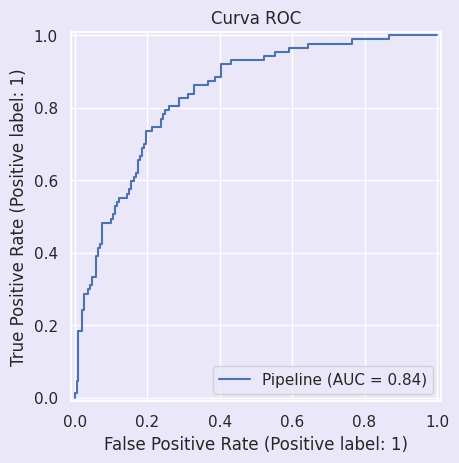

In [ ]:
RocCurveDisplay.from_estimator(pipeline, X_train, y_train)
plt.title("Curva ROC")
plt.show()

## **Resultado del Entrenamiento**:

**AUC = 0.84:** Indica que es un buen desempeño, aunque no perfecto, para el conjunto de entrenamiento. Esto implica que el modelo puede distinguir razonablemente entre clases positivas y negativas.

## **Curva ROC - Prueba**

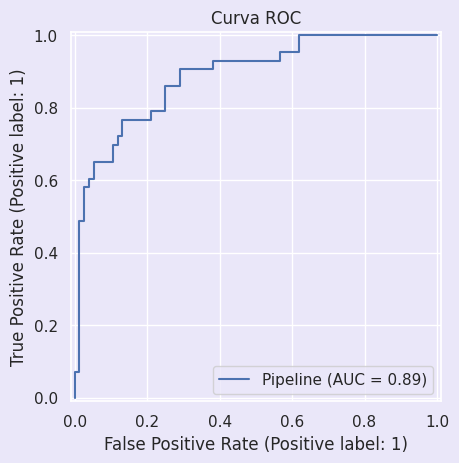

In [ ]:
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("Curva ROC")
plt.show()

## **Resultado de la Prueba:**

**AUC = 0.89:** Muestra un mejor desempeño en el conjunto de prueba, lo que podría indicar un modelo que generaliza adecuadamente a datos nuevos.

## **Conclusión de los resultados del Entrenamiento y de la Prueba**

1. **Entrenamiento:** El modelo es capaz de capturar patrones significativos en los datos originales sin ser excesivamente específico.
2. **Prueba:** La curva ROC y el AUC indican que el modelo generaliza bien a datos no vistos, mostrando confianza en sus predicciones.
3.   **Balance:** El modelo está equilibrado, con una diferencia aceptable entre el rendimiento en entrenamiento y prueba.



In [ ]:
import statsmodels.api as sm

# Se Agrega una constante al conjunto de entrenamiento.
X_train_with_const = sm.add_constant(X_train)

# Se Ajusta el modelo de regresión logística con statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Resumen del modelo, incluyendo los coeficientes, p-valores y significancia
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.457618
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  275
Model:                          Logit   Df Residuals:                      266
Method:                           MLE   Df Model:                            8
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.2668
Time:                        23:40:41   Log-Likelihood:                -125.85
converged:                       True   LL-Null:                       -171.63
Covariance Type:            nonrobust   LLR p-value:                 2.238e-16
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.2985      1.295     -6.409      0.000     -10.836

## **Constante (const):**
**Coeficiente:** -8.2985. Representa el punto de partida (baseline) del modelo cuando todas las variables independientes son iguales a cero.
**Significancia (P>|z|):** 0.000 (muy significativo). Esto indica que el término constante es importante para el modelo.

## **Pregnancies (Número de embarazos):**
**Coeficiente:** 0.1115. Cada embarazo adicional incrementa los log-odds de diabetes en 0.1115.
**Significancia (P>|z|):** 0.085 (no significativo al nivel 0.05, pero cercano). Esto significa que no hay suficiente evidencia estadística para afirmar que esta variable tiene un impacto significativo en el diagnóstico de diabetes, aunque es un resultado cercano al nivel de significancia.

## **Glucose (Glucosa):**
Coeficiente: 0.0356. Cada unidad adicional de glucosa incrementa los log-odds de diabetes en 0.0356.
Significancia (P>|z|): 0.000 (muy significativo). La glucosa es una variable muy influyente en el diagnóstico de diabetes, con alta evidencia estadística.

## **BloodPressure (Presión arterial):**
Coeficiente: -0.0086. Cada unidad adicional de presión arterial reduce ligeramente los log-odds de diabetes.
**Significancia (P>|z|):** 0.542 (no significativo). Esto sugiere que esta variable no tiene un impacto estadísticamente significativo en el modelo.

## **SkinThickness (Grosor de la piel):**
Coeficiente: 0.0122. Incrementa ligeramente los log-odds de diabetes.
Significancia (P>|z|): 0.531 (no significativo). Esta variable no parece ser relevante para predecir diabetes en este modelo.

## **Insulin (Insulina):**
Coeficiente: -0.0003. Tiene un impacto negativo, pero extremadamente pequeño, en los log-odds de diabetes.
Significancia (P>|z|): 0.820 (no significativo). No es un factor estadísticamente relevante en este modelo.

## **BMI (Índice de Masa Corporal):**
Coeficiente: 0.0579. Incrementa los log-odds de diabetes en 0.0579 por cada unidad adicional de BMI.
Significancia (P>|z|): 0.062 (cercano a significativo). Esto indica que podría haber un efecto, pero no es estadísticamente concluyente al nivel 0.05.

## **DiabetesPedigreeFunction (Historial familiar):**
Coeficiente: 7.937e-05 (muy cercano a 0). Tiene un impacto prácticamente nulo en los log-odds de diabetes.
Significancia (P>|z|): 0.870 (no significativo). No tiene relevancia estadística en el modelo.

## **Age (Edad):**
Coeficiente: 0.0271. Cada año adicional incrementa ligeramente los log-odds de diabetes en 0.0271.
Significancia (P>|z|): 0.170 (no significativo). Aunque parece influir ligeramente, no es estadísticamente significativo.